<a href="https://colab.research.google.com/github/Krizzna69/ML/blob/main/Testru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
train_data_path = 'train.csv'

In [ ]:
train_data = pd.read_csv(train_data_path)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train_data[features]
y = train_data.SalePrice

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_X,val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [ ]:
predictions = rf_model.predict(val_X)

In [ ]:
print(rf_model.score(train_X,train_y))

0.968277594483905


In [ ]:
print(predictions)


[187439.65       149083.25       129767.58        85257.
 149803.09       272586.79       326443.03       146521.5
 220213.25       230411.5        173464.5        102247.36
 204792.21       245101.54       255794.73       113153.5
 113356.         146016.24       191653.77       142532.6
 148765.5        194716.4        221809.         315077.49
 105664.         169499.5        126757.58       191800.86
 500298.02       128329.04       146786.36       100409.66666667
 121062.5        107875.         132895.83       345668.25
 114746.5        109237.71       289211.26       109256.5
 145510.75       132667.5        105491.         115135.75
 182216.         172469.          89118.5        196786.79
 243525.29       221627.1        126305.5        393993.55
 105281.         238323.83       191915.79       111486.5
 128926.         174488.         124880.25       170135.03
 166700.         317512.85       119112.         126428.
 165634.         125155.5        133505.98       225090.7
 

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(val_y, predictions)
print(mae)

21857.15912981083


In [ ]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
test_X = test_data[features]
predictions_test = rf_model.predict(test_X)


In [ ]:
print(predictions_test)

[112695.5  151265.   184699.   ... 158175.24 139285.   225984.9 ]


In [ ]:
import matplotlib.pyplot as plt

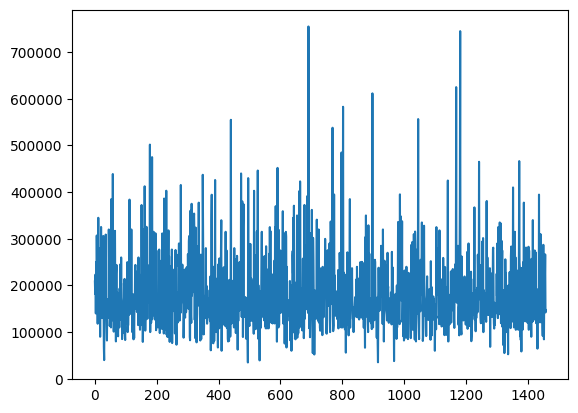

In [ ]:
plt.plot(train_data.SalePrice)
plt.show()

In [ ]:
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
Q1 = train_data.SalePrice.quantile(0.25)
Q3 = train_data.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

84025.0


In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit)
print(upper_limit)

3937.5
340037.5


In [ ]:
train_data = train_data[(train_data.SalePrice>lower_limit)&(train_data.SalePrice<upper_limit)]

In [ ]:
train_data.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
train_data.SalePrice.describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

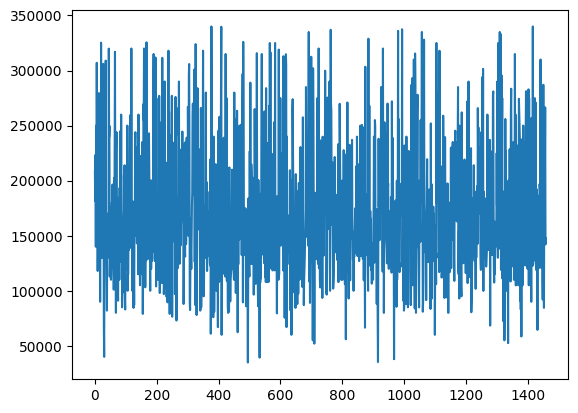

In [ ]:
plt.plot(train_data.SalePrice)

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X,y)

In [ ]:
rf_model.fit(train_X,train_y)
rf_model.score(train_X,train_y)
print(rf_model.score(train_X,train_y))

0.9686894438454757


In [ ]:
predictions = rf_model.predict(val_X)
mae = mean_absolute_error(predictions,val_y)

In [ ]:
print(mae)

23948.536862100456


In [ ]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
test_X = test_data[features]
predictions_test = rf_model.predict(test_X)
print(predictions_test)

[128220.5  167529.   182304.7  ... 166489.58 122980.   228943.6 ]
